# Foundations of Data Science
## Homework 5: Algorithmic fairness

Student Name: Tekuri Sai Akhil

Student Id: st5050

***

### Part 1: Algorithmic fairness (15 points)


#### Data acquisition and preparation (5 points)

For this question we will use the "Adult.data" dataset from the UC Irvine repository.

This data is from the United States census, and we will examine the algorithmic fairness for an income prediction task. For more information about the dataset, see [Here](https://archive.ics.uci.edu/ml/datasets/adult).


1\. Download the data. (1 point)

Load data from the URL using the pandas read_csv method.

In [1]:
#Place code here
import numpy as np
import pandas as pd
df = pd.read_csv("adult/adult.data", header=None)

2\. If the column headers are not correct, assign names to them (hint: use the readme from the source website). Compute descriptive statistics for the education level. (2 points).

In [2]:
#Place code here
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
print(df["education"].describe(include='object'))

count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object


3\. Select one attribute as protected. Explain the reason why you selected this attribute. (1 point)

Protected attributes require the prefix protected. The outcome attribute requires the prefix target. For example, if you need to measure fairness rankings of a dataset with the columns sex and credit_score, rename the columns to protected_sex and target_credit_Score. Update the column names for our dataset (hint: you may also have to convert the target to a binary variable and create dummy variables for those that are categorical, for upcoming steps). (1 point).

In [3]:
#Place code here
df.rename(columns={'race':'protected_race','income':"target_income" }, inplace=True)
df['target_income'] = np.where(df['target_income'].astype('string') == " <=50K", 0,1)

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df['workclass'] = encoder.fit_transform(df['workclass'])
df['education'] = encoder.fit_transform(df['education'])
df['marital-status'] = encoder.fit_transform(df['marital-status'])
df['occupation'] = encoder.fit_transform(df['occupation'])
df['relationship'] = encoder.fit_transform(df['relationship'])
df['protected_race'] = encoder.fit_transform(df['protected_race'])
df['sex'] = encoder.fit_transform(df['sex'])
df['native-country'] = encoder.fit_transform(df['native-country'])

#### Build a Classifier (5 points)

4\. Select a type of classifier to build for the income prediction task. Give reasoning for why you picked this type. (1 point)

$\color{blue}{\text{ Place your answer here.}}$
1. Desicion tree classifer

5\. Split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn. (1 point)


In [4]:
n = df.shape[0]

np.random.seed(42)

test_index = []
while len(test_index) < 0.2*n:
    new_index = np.random.randint(0,n)
    if new_index not in test_index:
        test_index.append(new_index)

train_df = df[~df.index.isin(test_index)]
test_df = df[df.index.isin(test_index)]

print("Complete dataframe shape: "+ str(df.shape))
print("Train dataframe shape: "+ str(train_df.shape))
print("Test dataframe shape: "+ str(test_df.shape))

X_train, Y_train = train_df.iloc[:,:14], train_df.iloc[:,14]
X_test, Y_test = test_df.iloc[:,:14], test_df.iloc[:,14]

Complete dataframe shape: (32561, 15)
Train dataframe shape: (26048, 15)
Test dataframe shape: (6513, 15)


In [5]:
Y_test

9        1
11       1
13       0
16       0
24       0
        ..
32537    0
32542    0
32550    0
32554    1
32556    0
Name: target_income, Length: 6513, dtype: int64

6\. On the training set, implement your classifier. Give reasoning for your choice of any hyperparameter(s). (1 point)

In [6]:
#Place code here
# from sklearn.tree import DecisionTreeClassifier
# des_tree = DecisionTreeClassifier(criterion='entropy')
# des_tree.fit(X_train,Y_train)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42).fit(X_train,Y_train)

7\. To demonstrate the performance of your classifier, we will now plot the AUROC. Below are two functions which you can use. What you need to add is code to plot the AUROC for all the data and as well for each value of the protected attribute (on one set of axes). (2 points)

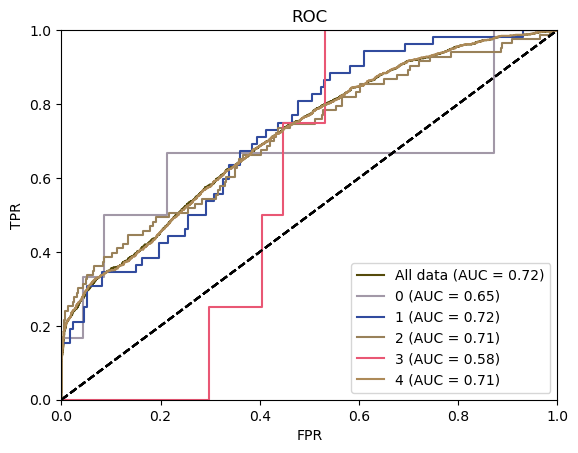

In [7]:
#Code for computing the AUCROC

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def getAUC(truth, pred):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    return auc(fpr, tpr)


def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

#Add code below to subset rows by protected attribute
Y_pred = log_reg.predict_proba(X_test)[:, 1]

X_test_0 = X_test[X_test['protected_race']==0]
Y_test_0 = Y_test[X_test[X_test['protected_race']==0].index]
Y_pred_0 = log_reg.predict_proba(X_test_0)[:, 1]

X_test_1 = X_test[X_test['protected_race']==1]
Y_test_1 = Y_test[X_test[X_test['protected_race']==1].index]
Y_pred_1 = log_reg.predict_proba(X_test_1)[:, 1]

X_test_2 = X_test[X_test['protected_race']==2]
Y_test_2 = Y_test[X_test[X_test['protected_race']==2].index]
Y_pred_2 = log_reg.predict_proba(X_test_2)[:, 1]

X_test_3 = X_test[X_test['protected_race']==3]
Y_test_3 = Y_test[X_test[X_test['protected_race']==3].index]
Y_pred_3 = log_reg.predict_proba(X_test_3)[:, 1]

X_test_4 = X_test[X_test['protected_race']==4]
Y_test_4 = Y_test[X_test[X_test['protected_race']==4].index]
Y_pred_4 = log_reg.predict_proba(X_test_4)[:, 1]

#Add code below to make the plot
plotAUC(Y_test, Y_pred, "All data")
plotAUC(Y_test_0, Y_pred_0, "0")
plotAUC(Y_test_1, Y_pred_1, "1")
plotAUC(Y_test_2, Y_pred_2, "2")
plotAUC(Y_test_3, Y_pred_3, "3")
plotAUC(Y_test_4, Y_pred_4, "4")

#### Assessing algorithmic fairness (5 points)

8\. Algorithmic Fairness metrics (2 points)

Pick a fairness metric to apply to the income prediction task and your selected protected attribute. Explain why you selected this metric.

$\color{blue}{\text{ Place your answer here.}}$
1. Equality of opportunity

9\. Compute the chosen metric for your protected attribute. Hint: this will require you to first find the threshold wiith the best when predicting on the entire data, and then computing the TPR/FPR or other necessary parameters at that threshold for each value of the protected attribute. (2 points)

There are many ways we could locate the threshold with the optimal balance between the false positive rate (FPR) and true positive rate (TPR).

As a reminder, the TPR is called the Sensitivity. The inverse of the false-positive rate (1-FPR) is called the Specificity.

<center>Sensitivity = $\frac{TP}{TP + FN}$
Specificity = $\frac{TN}{FP + TN}$</center>

where:

<center>Sensitivity = TPR and Specificity = 1 – FPR</center>

The Geometric Mean or g-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

<center>g-mean = $\sqrt{Sensitivity * Specificity}$ </center>



In [8]:
#Place code here
from sklearn.metrics import confusion_matrix

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

sensitivity = tpr
specificity = 1-fpr
g_mean = np.sqrt(sensitivity*specificity)
index = np.argmax(g_mean)
best_threshold = thresholds[index]

Y_pred = np.where(Y_pred>best_threshold,1,0)
Y_pred_0 = np.where(Y_pred_0>best_threshold,1,0)
Y_pred_1 = np.where(Y_pred_1>best_threshold,1,0)
Y_pred_2 = np.where(Y_pred_2>best_threshold,1,0)
Y_pred_3 = np.where(Y_pred_3>best_threshold,1,0)
Y_pred_4 = np.where(Y_pred_4>best_threshold,1,0)


cf_all = confusion_matrix(Y_test, Y_pred)
cf_0 = confusion_matrix(Y_test_0, Y_pred_0)
cf_1 = confusion_matrix(Y_test_1, Y_pred_1)
cf_2 = confusion_matrix(Y_test_2, Y_pred_2)
cf_3 = confusion_matrix(Y_test_3, Y_pred_3)
cf_4 = confusion_matrix(Y_test_4, Y_pred_4)

EOO_all = (1.0*cf_all[1,1])/(cf_all[1,1]+cf_all[1,0])
EOO_0 = (1.0*cf_0[1,1])/(cf_0[1,1]+cf_0[1,0])
EOO_1 = (1.0*cf_1[1,1])/(cf_1[1,1]+cf_1[1,0])
EOO_2 = (1.0*cf_2[1,1])/(cf_2[1,1]+cf_2[1,0])
EOO_3 = (1.0*cf_3[1,1])/(cf_3[1,1]+cf_3[1,0])
EOO_4 = (1.0*cf_4[1,1])/(cf_4[1,1]+cf_4[1,0])

print("Equality of opportunity_all = "+str(EOO_all))
print("Equality of opportunity_0 = "+str(EOO_0))
print("Equality of opportunity_1 = "+str(EOO_1))
print("Equality of opportunity_2 = "+str(EOO_2))
print("Equality of opportunity_3 = "+str(EOO_3))
print("Equality of opportunity_4 = "+str(EOO_4))

Equality of opportunity_all = 0.622533418204965
Equality of opportunity_0 = 0.6666666666666666
Equality of opportunity_1 = 0.9423076923076923
Equality of opportunity_2 = 0.5180722891566265
Equality of opportunity_3 = 0.5
Equality of opportunity_4 = 0.6171107994389902


10\. Is there a disparity? How can we interpret its magnitude? Is such a disparity a bad thing/avoidable? (1 point)

$\color{blue}{\text{ Place your answer here.}}$